#**<center>Finding Appropriate Drug for Patient Based on Historical Data using Decision Tree</center>**

<center>Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.
Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The feature sets of this dataset are Age, Sex, Blood Pressure, and Cholesterol of patients, and the target is the drug that each patient responded to.
It is a sample of binary classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe it to a new patient.</center>

###**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

###**Downloading the Dataset from IBM Object Storage**

In [2]:
!wget -O PatientData.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv

--2020-07-11 05:24:05--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6027 (5.9K) [text/csv]
Saving to: ‘PatientData.csv’

PatientData.csv     100%[===================>]   5.89K  --.-KB/s    in 0s      

2020-07-11 05:24:05 (835 MB/s) - ‘PatientData.csv’ saved [6027/6027]



###**Reading & Exploring Data**

In [3]:
df = pd.read_csv('PatientData.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
print("Size of the Dataset is: ", df.shape[0])

Size of the Dataset is:  200


In [5]:
df['Drug'].value_counts()

drugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: Drug, dtype: int64

###**Data Pre-Processing**
As you may figure out, some features in this dataset are categorical such as **Sex** or **BP**. Unfortunately, Sklearn Decision Trees *do not handle categorical variables*. But still we can convert these features to numerical values. **`pandas.get_dummies()`** Convert categorical variable into dummy/indicator variables.

In [6]:
from sklearn.preprocessing import LabelEncoder

X_data = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
y_data = df['Drug'].values

le_sex = LabelEncoder()
X_data[:,1] = le_sex.fit(X_data[:,1]).transform(X_data[:,1])

le_bp = LabelEncoder()
X_data[:,2] = le_bp.fit(X_data[:,2]).transform(X_data[:,2])

le_chol = LabelEncoder()
X_data[:,3] = le_chol.fit(X_data[:,3]).transform(X_data[:,3])

###**Splitting Train & Test Set**

In [7]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X_data, y_data, test_size=0.3, random_state=3)
print("Size of Train Set: ", train_X.shape[0])
print("Size of Test Set: ", test_X.shape[0])

Size of Train Set:  140
Size of Test Set:  60


###**Training Our Classifier using Decision Tree**

In [8]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='entropy', max_depth=4)
classifier.fit(train_X, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [9]:
predicted_y = classifier.predict(test_X)
print(predicted_y[:5])
print(test_y[:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
['drugY' 'drugX' 'drugX' 'drugX' 'drugX']


###**Model Evaluation**

In [10]:
from sklearn.metrics import accuracy_score

print("The Accuracy of the Model is: ", accuracy_score(predicted_y, test_y))

The Accuracy of the Model is:  0.9833333333333333


###**Decision Tree Visualization**

In [11]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import matplotlib.image as mpimg
import pydotplus

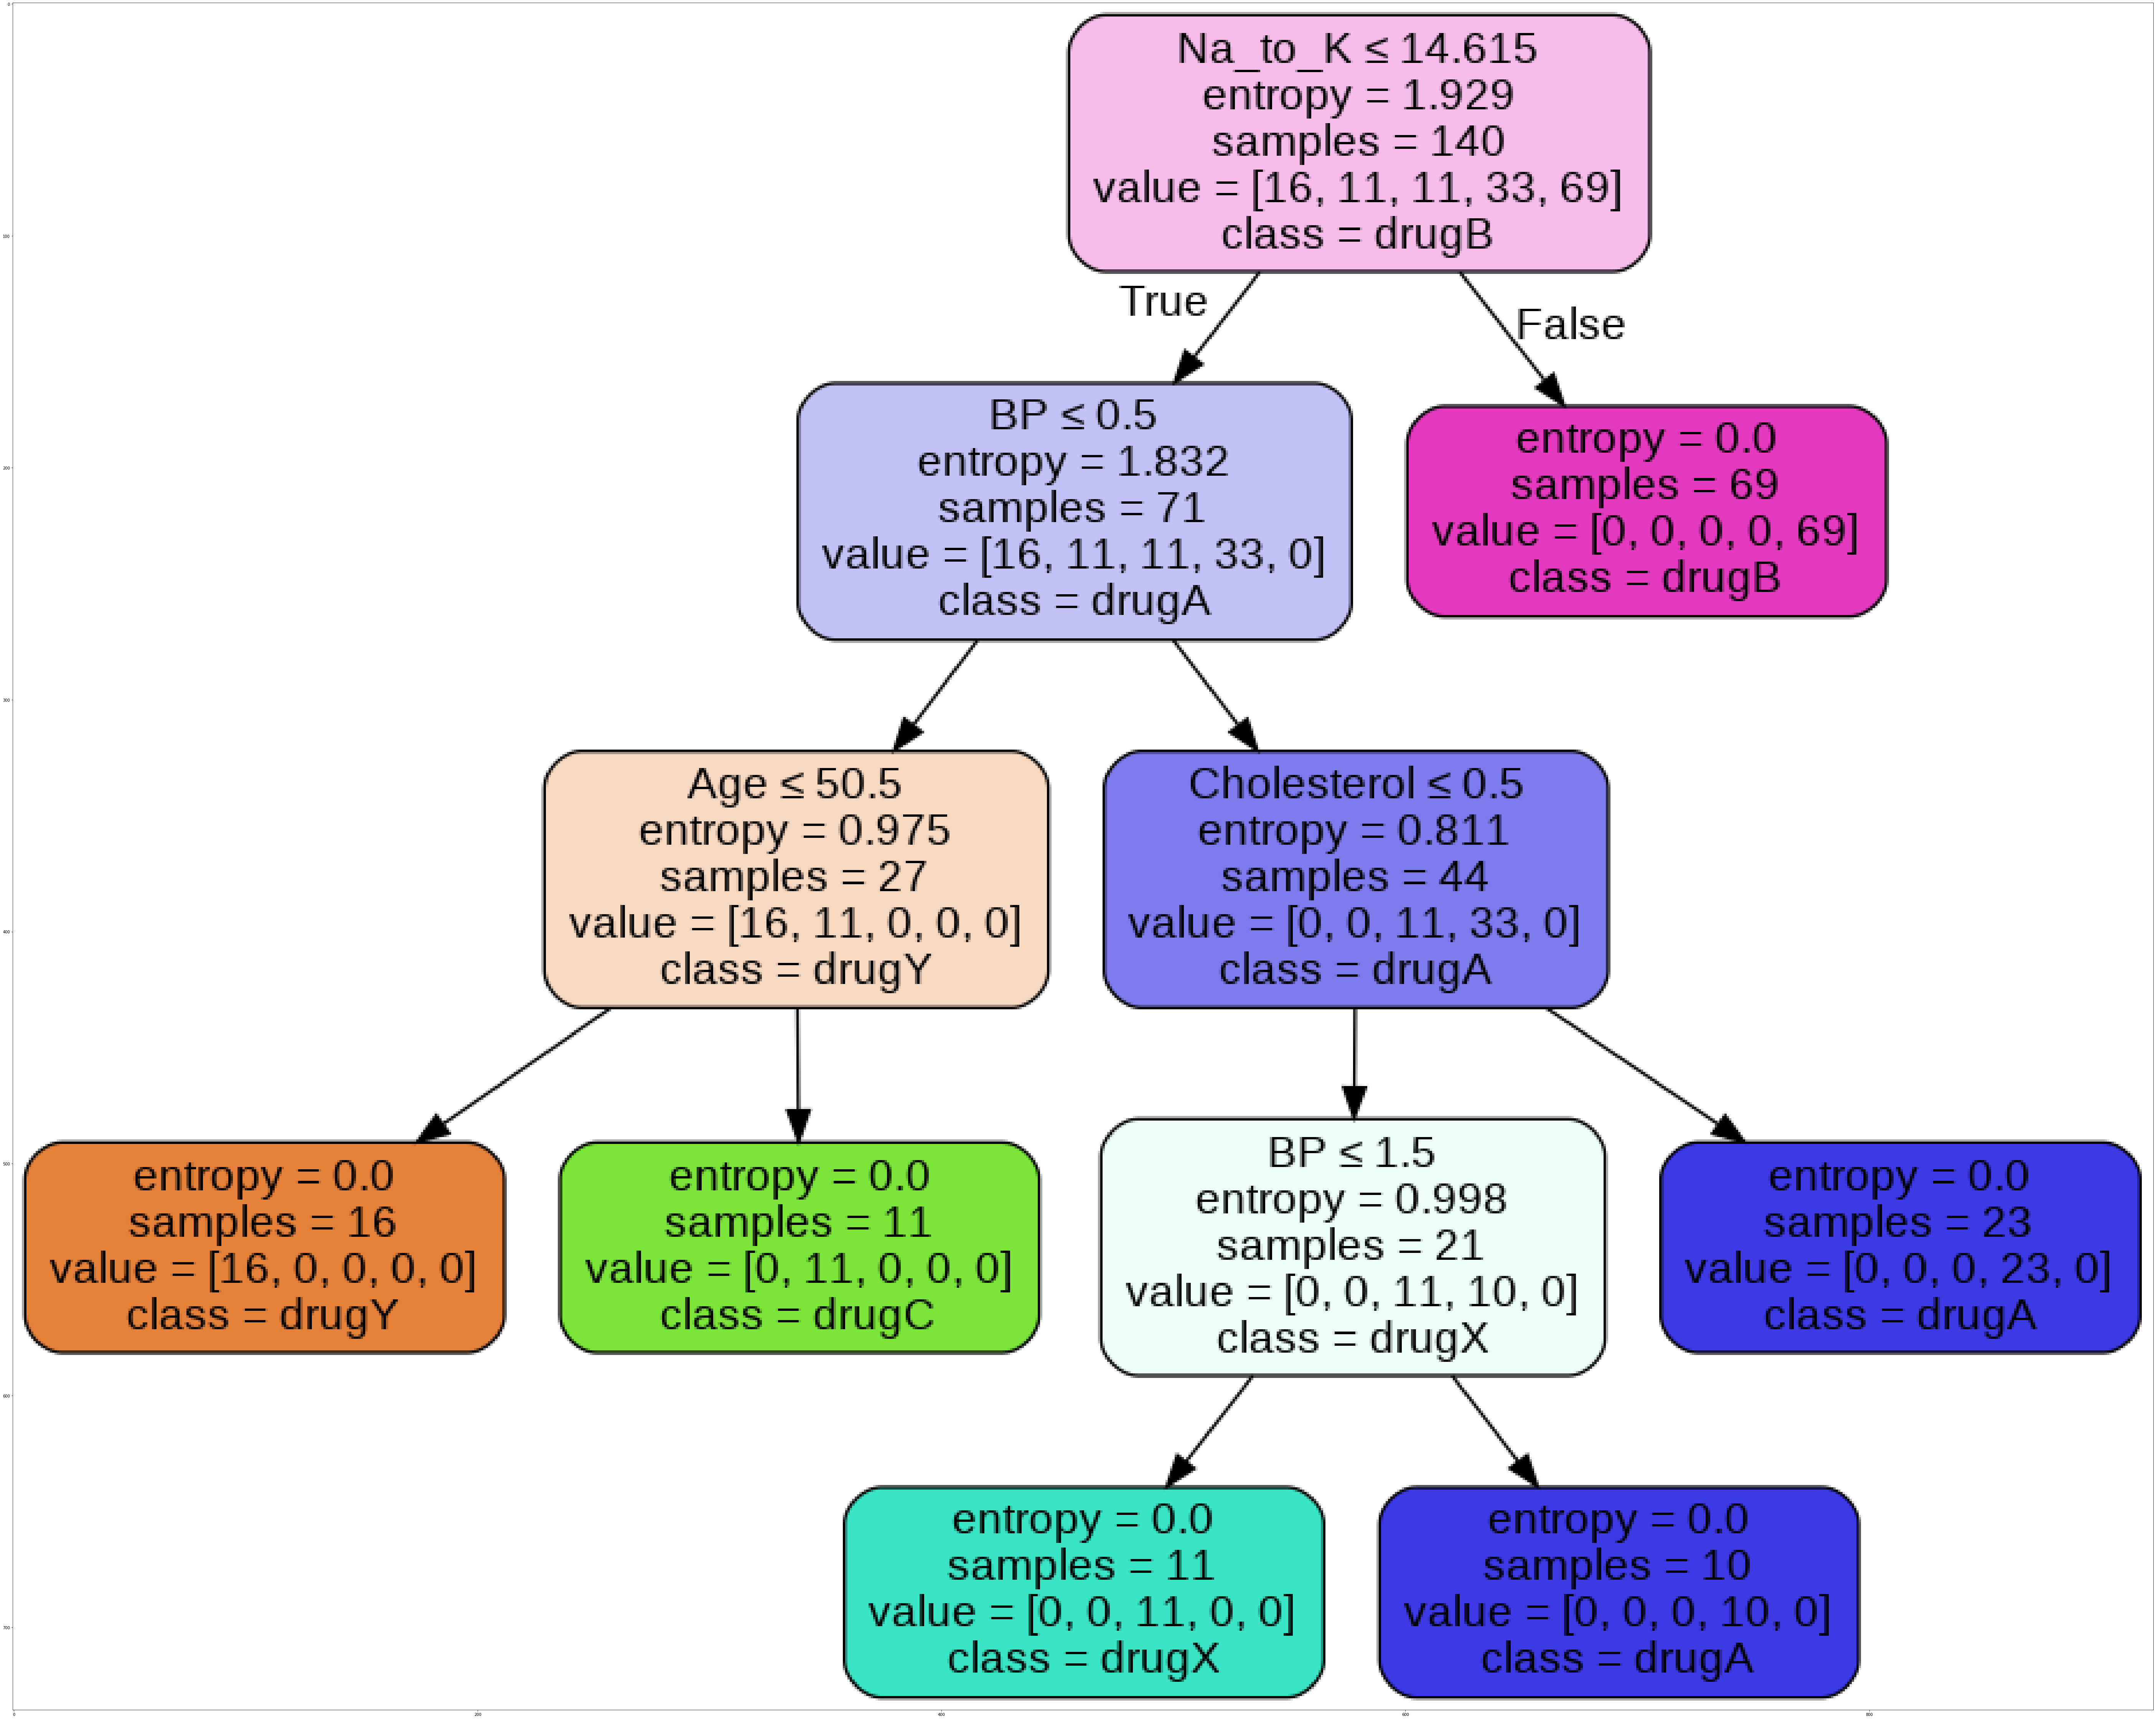

In [27]:
dot_data = StringIO()
filename = 'decision_tree.png'
feature_names = df.columns[:5]
target_name = df['Drug'].unique().tolist()
output = export_graphviz(classifier, out_file=dot_data, feature_names=feature_names, class_names=target_name, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

##**<center>Thank You for Your Patience</center>**